In [117]:
import glob
from os.path import join, splitext, basename
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [5]:
from os import getcwd
import sys
sys.path.append(join(getcwd(), "src"))
import stock_history

In [124]:
import importlib
importlib.reload(stock_history)

<module 'stock_history' from 'C:\\Users\\hamza\\Documents\\school\\cs_229\\cs229_final_project\\src\\stock_history.py'>

In [133]:
stocks = ['aapl', 'goog', 'tsla', 'pfe', 'ibm', 'xom', 'tasr', 'intc']

In [89]:
DATA_LOC = join('data', 'stocks')
stock_files = glob.glob(join(DATA_LOC, '*.csv'))

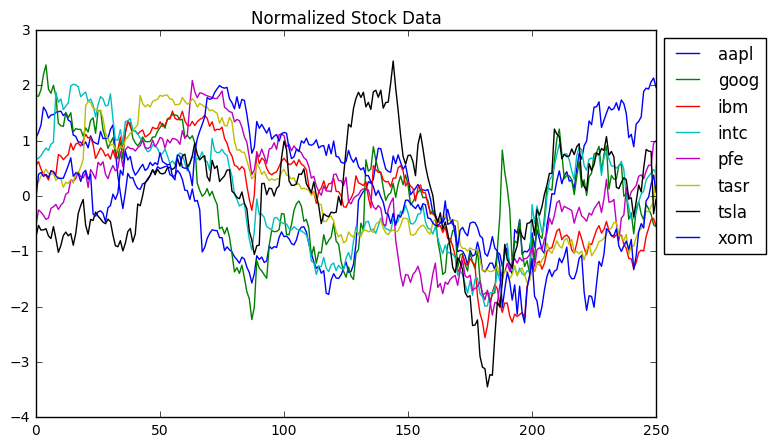

In [128]:
tickers = dict()

f = plt.figure(figsize=(8, 5))
ax = f.gca()

for f in stock_files: 
    s = splitext(basename(f))[0]
    d = stock_history.read_stock_history(f)
    # standardize data for plotting / comparrison
    d['CloseNorm'] = preprocessing.scale(d['Close'])
    tickers[s] = d
    
    ax.plot(preprocessing.scale(d['CloseNorm']), label=s)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Normalized Stock Data')